In [ ]:
import pandas as pd

import numpy as np

from matplotlib.pylab import plt

In [26]:
from sklearn.preprocessing import StandardScaler


In [6]:
train = pd.read_csv("../data/train.csv")
test=pd.read_csv("../data/test.csv")
data=pd.concat([train,test])
print(len(data))
print(len(train))
print(len(test))

2919
1460
1459


In [14]:
print(data.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [37]:
data.corr()[np.abs(data.corr())>0.5]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.605852,NaN,NaN,0.801670,NaN,NaN,NaN,NaN
2ndFlrSF,NaN,1.000000,NaN,0.503506,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.584586,NaN,NaN,NaN,NaN,NaN
3SsnPorch,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,NaN,0.503506,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.669737,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,1.000000,NaN,0.638847,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.536467,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFullBath,NaN,NaN,NaN,NaN,0.638847,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtHalfBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnclosedPorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
infoDf=pd.DataFrame()
infoDf['train']=train.info()
infoDf['test']=test.info()
infoDf['data']=data.info()
infoDf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,train,test,data


###  in train : Alley(8%) , fireplaceQu(50%)  , PoolQc(7 vals ) ,fence(20%) ,  MicsFeature(5%) dont have even 5% of data
###  in test : Alley(8%)  , FirePlaceQu (50%) , PoolQc (only 3 vals) , fence (20% ) , MiscFeature (5% only)

In [24]:
data=data.drop(['Alley','Fence','MiscFeature','PoolQC'])

# 1stFlrSF

In [26]:
data['1stFlrSF'].head()

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64

In [27]:
data['1stFlrSF'].describe()

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

In [29]:
data[['1stFlrSF','SalePrice']].corr()

,1stFlrSF,SalePrice
1stFlrSF,1.000000,0.605852
SalePrice,0.605852,1.000000


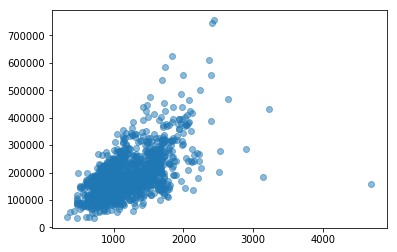

In [31]:
plt.scatter(data['1stFlrSF'],data['SalePrice'],alpha=0.5)
plt.show()

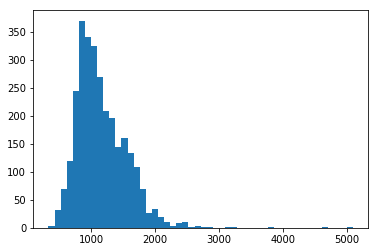

In [45]:
plt.hist(data['1stFlrSF'],bins=50)
plt.show()

In [38]:
data.corr()['1stFlrSF']

1stFlrSF         1.000000
2ndFlrSF        -0.249823
3SsnPorch        0.044086
BedroomAbvGr     0.108418
BsmtFinSF1       0.458092
BsmtFinSF2       0.084330
BsmtFullBath     0.261816
BsmtHalfBath     0.011074
BsmtUnfSF        0.296600
EnclosedPorch   -0.065796
Fireplaces       0.407545
FullBath         0.373077
GarageArea       0.492011
GarageCars       0.440540
GarageYrBlt      0.260450
GrLivArea        0.562538
HalfBath        -0.104141
Id              -0.008678
KitchenAbvGr     0.076071
LotArea          0.332460
LotFrontage      0.458247
LowQualFinSF    -0.012704
MSSubClass      -0.248641
MasVnrArea       0.395834
MiscVal          0.093062
MoSold           0.040143
OpenPorchSF      0.238502
OverallCond     -0.157418
OverallQual      0.479152
PoolArea         0.121900
SalePrice        0.605852
ScreenPorch      0.098381
TotRmsAbvGrd     0.391782
TotalBsmtSF      0.801670
WoodDeckSF       0.227347
YearBuilt        0.310814
YearRemodAdd     0.242245
YrSold          -0.013442
Name: 1stFlr

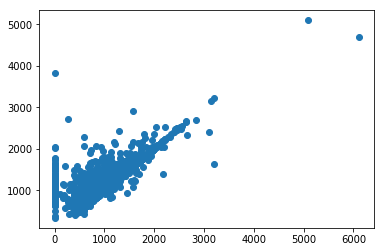

In [39]:
plt.scatter(data['TotalBsmtSF'],data['1stFlrSF'])
plt.show()

In [40]:
data['TotalBsmtSF'].describe()

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

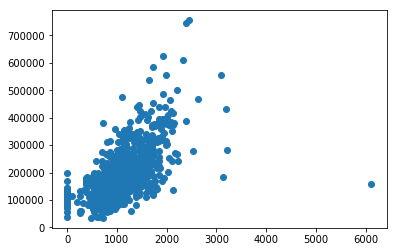

In [41]:
plt.scatter(data['TotalBsmtSF'],data['SalePrice'])
plt.show()

In [43]:
data['1stFlrSFLog']=np.sqrt(data['1stFlrSF'])
data.corr()['1stFlrSFLog']

1stFlrSF         0.991021
2ndFlrSF        -0.259005
3SsnPorch        0.046081
BedroomAbvGr     0.121741
BsmtFinSF1       0.440466
BsmtFinSF2       0.089266
BsmtFullBath     0.263705
BsmtHalfBath     0.011947
BsmtUnfSF        0.304218
EnclosedPorch   -0.067637
Fireplaces       0.406350
FullBath         0.375045
GarageArea       0.494330
GarageCars       0.448546
GarageYrBlt      0.261513
GrLivArea        0.548040
HalfBath        -0.118922
Id              -0.011657
KitchenAbvGr     0.080767
LotArea          0.326029
LotFrontage      0.460218
LowQualFinSF    -0.010068
MSSubClass      -0.267580
MasVnrArea       0.376466
MiscVal          0.062085
MoSold           0.043485
OpenPorchSF      0.228120
OverallCond     -0.159291
OverallQual      0.477052
PoolArea         0.105949
SalePrice        0.604609
ScreenPorch      0.105071
TotRmsAbvGrd     0.389867
TotalBsmtSF      0.792943
WoodDeckSF       0.224641
YearBuilt        0.313980
YearRemodAdd     0.241279
YrSold          -0.015054
1stFlrSFLog 

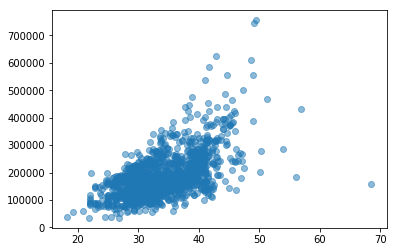

In [44]:
plt.scatter(data['1stFlrSFLog'],data['SalePrice'],alpha=0.5)
plt.show()

In [50]:
data['1stFlrSF'].quantile(0.95)
data['1stFlrSF'].quantile(0.05)

1830.1

In [10]:
print(data['1stFlrSF'].describe())

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64


In [17]:
data['1stFlrSFClipped']=data['1stFlrSF'].clip(665,1830)

In [18]:
print(data['1stFlrSFClipped'].describe())

count    2919.000000
mean     1148.723535
std       335.529375
min       665.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      1830.000000
Name: 1stFlrSFClipped, dtype: float64


In [41]:
np.sort(data.corr()['1stFlrSFClipped']-data.corr()['1stFlrSF'])

array([-0.07856681, -0.05491391, -0.05320516, -0.045371  , -0.04500772,
       -0.03943326, -0.03433457, -0.03147221, -0.03069633, -0.02948987,
       -0.02911783, -0.02418646, -0.02362202, -0.01754849, -0.0118424 ,
       -0.01010209, -0.00911006, -0.00647434, -0.0045285 , -0.00430984,
       -0.00386945, -0.00361439, -0.0026962 , -0.00177986,  0.00293335,
        0.00297241,  0.00300482,  0.00425005,  0.0042958 ,  0.00445735,
        0.0044947 ,  0.00813567,  0.00935775,  0.01239394,  0.01297708,
        0.0135068 ,  0.01637866,  0.01957571,  0.045371  ,  0.045371  ])

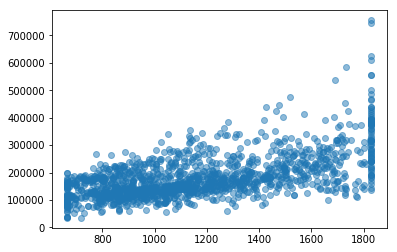

In [28]:
plt.scatter(data['1stFlrSFClipped'],data['SalePrice'],alpha=0.5)
plt.show()

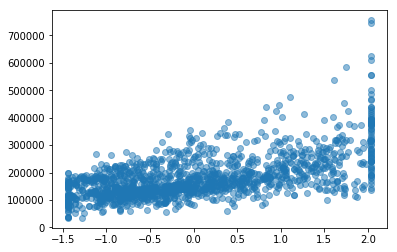

In [38]:
sc=StandardScaler()
data['1stFlrSFClippedTrans']=sc.fit_transform(np.reshape(data['1stFlrSFClipped'],(len(data['1stFlrSFClipped']),1)))
data['1stFlrSFClippedTrans'].describe()
data.corr()['1stFlrSFClippedTrans']#>=data.corr()['1stFlrSF']
plt.scatter(data['1stFlrSFClippedTrans'],data['SalePrice'],alpha=0.5)
plt.show()

### this has correlation 0.606 , which is good  
### i tries 3 things : 
1.  Log : did not help as such , dec the corr
2. removed outliers : clipped the data to 0.05 and 0.95 vals (665,1830) , same 0.601 corr
3. Did standard scalar : same with this also 

Will not go ahead with this (clipped and standardscalar)
### Changed : 1stFlrSFClippedTrans
### Final Col name : 1stFlrSF


##  MSSubClass

In [45]:
data['MSSubClass']
data['MSSubClass'].describe()

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [46]:
data.corr()['MSSubClass']

1stFlrSF               -0.248641
2ndFlrSF                0.309309
3SsnPorch              -0.037529
BedroomAbvGr           -0.008796
BsmtFinSF1             -0.064311
BsmtFinSF2             -0.072530
BsmtFullBath            0.009950
BsmtHalfBath           -0.001878
BsmtUnfSF              -0.125994
EnclosedPorch          -0.020867
Fireplaces             -0.055151
FullBath                0.139140
GarageArea             -0.103394
GarageCars             -0.046597
GarageYrBlt             0.087898
GrLivArea               0.071677
HalfBath                0.178750
Id                      0.008931
KitchenAbvGr            0.260155
LotArea                -0.201730
LotFrontage            -0.417359
LowQualFinSF            0.026482
MSSubClass              1.000000
MasVnrArea              0.005433
MiscVal                -0.028867
MoSold                 -0.001231
OpenPorchSF            -0.015923
OverallCond            -0.065625
OverallQual             0.033638
PoolArea               -0.003080
SalePrice 

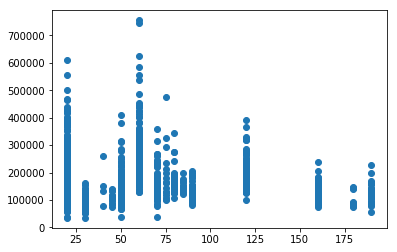

In [49]:
plt.scatter(data['MSSubClass'],data['SalePrice'])
plt.show()

In [53]:
np.sort(data['MSSubClass'].unique())

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 150,
       160, 180, 190], dtype=int64)

(array([  1.21800000e+03,   6.00000000e+00,   3.05000000e+02,
          5.75000000e+02,   1.28000000e+02,   1.41000000e+02,
          1.57000000e+02,   0.00000000e+00,   0.00000000e+00,
          1.82000000e+02,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.28000000e+02,   0.00000000e+00,
          7.80000000e+01]),
 array([  20.   ,   30.625,   41.25 ,   51.875,   62.5  ,   73.125,
          83.75 ,   94.375,  105.   ,  115.625,  126.25 ,  136.875,
         147.5  ,  158.125,  168.75 ,  179.375,  190.   ]),
 <a list of 16 Patch objects>)

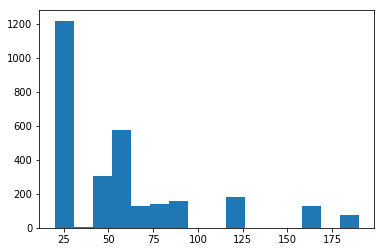

In [58]:
plt.hist(data['MSSubClass'],bins=16)

count       536.000000
mean     185224.811567
std       78782.189967
min       35311.000000
25%      132500.000000
50%      159250.000000
75%      220000.000000
max      611657.000000
Name: SalePrice, dtype: float64

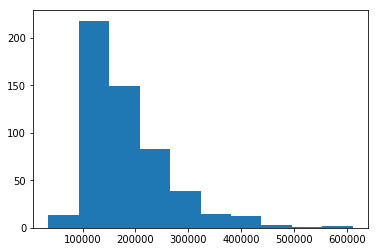

In [65]:
d1=data[(data.MSSubClass==20) & (data.SalePrice.isnull()==False)]['SalePrice']
plt.hist(dd)


####  MSSubClass is a catogorical variable with 16 catogories 
####  Mostly occuring is 20